<a href="https://colab.research.google.com/github/Topicos-IA-UNISON/curso-2024-1/blob/main/jugador.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Un ejemplito de programación dinámica

## Tópicos Avanzados en Inteligencia Artificial (2024-1)

### Licenciatura en Ciencia de la Computación

![](https://identidadbuho.unison.mx/wp-content/uploads/2019/06/letragrama-cmyk-72.jpg)


**Julio Waissman Vilanova**

22 de enero de 2024

In [1]:
import random

### 1. Las clases y los algoritmos básicos

In [44]:
class MDP(object):
  """
  Clase de un problema de desición de markov (MDP)

  Propiedades:
    S: Conjunto de estados
    A: Conjunto de acciones
    gamma: Factor de descuento

  Métodos:
    a_legales(s) -> subconjunto de A
    p(sp, s, a) -> float
    r(s, a, sp) -> float
    es_terminal(s) -> bool

  """

  def __init__(self, S, A, gamma):
    self.S = S
    self.A = A
    self.gamma = gamma

  def a_legales(self, s):
    acciones = [a for a in self.A]
    return acciones

  def p(self, sp, a, s):
    raise NotImpementedError('Del prototipo, es necesario implenentar')

  def r(self, s, a, sp):
    raise NotImpementedError('Del prototipo, es necesario implenentar')

  def es_terminal(self, s):
    raise NotImpementedError('Del prototipo, es necesario implenentar')



def iteración_de_valor(mdp, theta, max_it=1_000_000):

  V = {s: 0.0 if mdp.es_terminal(s) else random.random() for s in mdp.S}

  for _ in range(max_it):
    delta = 0
    for s in [state for state in mdp.S if not mdp.es_terminal(state)]:
      v = V[s]
      V[s] = max(
          sum(
              mdp.p(sp, s, a) * (mdp.r(s, a, sp) + mdp.gamma * V[sp])
              for sp in mdp.S
          )
          for a in mdp.a_legales(s)
      )
      delta = max(delta, abs(v - V[s]))

    if delta < theta:
      break
  return V

def politica(mdp, V):
  pi = {
      s: max(
          mdp.a_legales(s),
          key=lambda a: sum(
            mdp.p(sp, s, a) * (mdp.r(s, a, sp) + mdp.gamma * V[sp])
            for sp in mdp.S
          )
      )
      for s in mdp.S if not mdp.es_terminal(s)
  }
  return pi

## 2. El problema del jugador

In [45]:
class Jugador(MDP):
  def __init__(self, rho):
    self.S = list(range(101))
    self.A = list(range(51))
    self.gamma = 1.0
    self.rho = rho

  def a_legales(self, s):
    return list(range(s))

  def p(self, sp, a, s):
    return (
      self.rho if sp == s + a else
      1.0 - self.rho if sp == s - a else
      0
    )

  def r(self, s, a, sp):
    return 100 if sp == 100 else 0

  def es_terminal(self, s):
    return s in [0, 100]


In [59]:
jugador = Jugador(0.4)

v = iteración_de_valor(jugador, 0.001)
pi = politica(jugador, v)

v

{0: 0.0,
 1: 0.00018742496636303782,
 2: 0.16384000000000007,
 3: 0.40960000000000013,
 4: 0.40960000000000013,
 5: 1.0240000000000002,
 6: 1.0240000000000002,
 7: 1.0240000000000002,
 8: 2.5600000000000005,
 9: 2.5600000000000005,
 10: 2.5600000000000005,
 11: 2.5600000000000005,
 12: 2.5600000000000005,
 13: 2.5600000000000005,
 14: 6.4,
 15: 6.4,
 16: 6.4,
 17: 6.4,
 18: 6.4,
 19: 6.4,
 20: 6.4,
 21: 6.4,
 22: 6.4,
 23: 6.4,
 24: 6.4,
 25: 6.4,
 26: 16.0,
 27: 16.0,
 28: 16.0,
 29: 16.0,
 30: 16.0,
 31: 16.0,
 32: 16.0,
 33: 16.0,
 34: 16.0,
 35: 16.0,
 36: 16.0,
 37: 16.0,
 38: 16.0,
 39: 16.0,
 40: 16.0,
 41: 16.0,
 42: 16.0,
 43: 16.0,
 44: 16.0,
 45: 16.0,
 46: 16.0,
 47: 16.0,
 48: 16.0,
 49: 16.0,
 50: 16.0,
 51: 40.0,
 52: 40.0,
 53: 40.0,
 54: 40.0,
 55: 40.0,
 56: 40.0,
 57: 40.0,
 58: 40.0,
 59: 40.0,
 60: 40.0,
 61: 40.0,
 62: 40.0,
 63: 40.0,
 64: 40.0,
 65: 40.0,
 66: 40.0,
 67: 40.0,
 68: 40.0,
 69: 40.0,
 70: 40.0,
 71: 40.0,
 72: 40.0,
 73: 40.0,
 74: 40.0,
 75: 40.0

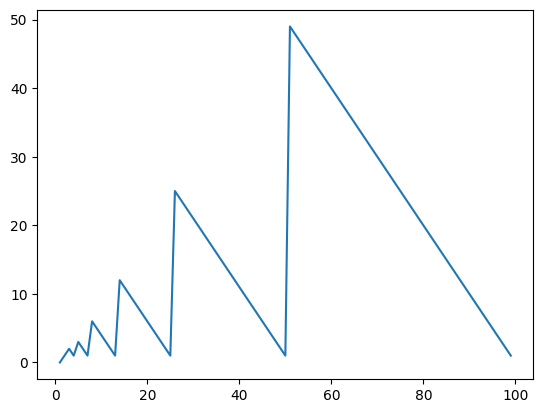

In [53]:
import numpy as np
import matplotlib.pyplot as plt

plt.plot(pi.keys(), pi.values())